In [0]:
from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.imagetransforms import TorchTransforms,  album_transforms
import torch
from torchvision import  transforms

In [0]:
helper = Helper()

In [11]:
mean, std = helper.get_mean_and_std('cifar10')

Files already downloaded and verified


In [0]:
test_transforms = [ transforms.ToTensor(),
                    transforms.Normalize(mean, std)
                  ]

In [0]:
torch_transforms = TorchTransforms(test_transforms)

In [14]:
aub = album_transforms()

Files already downloaded and verified


In [0]:
train_transforms = aub
test_transforms = torch_transforms.testTransform()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10')

In [16]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()

Files already downloaded and verified
Files already downloaded and verified


In [0]:
Net = ResNet18()

In [18]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [19]:
import torch.optim as optim
import torch.nn as nn
from vision.train_test_model import RunModel
from torch.optim.lr_scheduler import OneCycleLR

epochs = 25
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_dataloader), epochs=epochs)
run = RunModel(Net, train_dataloader, test_dataloader, criterion, optimizer, scheduler, epochs)
run.train_test()

Epoch: 1  Loss=1.471858263015747  Batch_id=1562  Train Accuracy=47.75: 100%|██████████| 1563/1563 [01:04<00:00, 24.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 60.94 % 



Epoch: 2  Loss=1.6047871112823486  Batch_id=1562  Train Accuracy=66.19: 100%|██████████| 1563/1563 [01:03<00:00, 24.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 70.89 % 



Epoch: 3  Loss=1.215652585029602  Batch_id=1562  Train Accuracy=74.01: 100%|██████████| 1563/1563 [01:04<00:00, 24.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 77.37 % 



Epoch: 4  Loss=0.8286715149879456  Batch_id=1562  Train Accuracy=78.31: 100%|██████████| 1563/1563 [01:03<00:00, 24.43it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 78.52 % 



Epoch: 5  Loss=1.1254284381866455  Batch_id=1562  Train Accuracy=81.80: 100%|██████████| 1563/1563 [01:04<00:00, 24.20it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 81.10 % 



Epoch: 6  Loss=0.46888288855552673  Batch_id=1562  Train Accuracy=84.25: 100%|██████████| 1563/1563 [01:04<00:00, 24.37it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.83 % 



Epoch: 7  Loss=1.0644371509552002  Batch_id=1562  Train Accuracy=86.50: 100%|██████████| 1563/1563 [01:04<00:00, 24.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 83.90 % 



Epoch: 8  Loss=0.4151014983654022  Batch_id=1562  Train Accuracy=88.31: 100%|██████████| 1563/1563 [01:04<00:00, 24.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 84.75 % 



Epoch: 9  Loss=0.25219660997390747  Batch_id=1562  Train Accuracy=89.86: 100%|██████████| 1563/1563 [01:04<00:00, 24.30it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.72 % 



Epoch: 10  Loss=0.3433130383491516  Batch_id=1562  Train Accuracy=91.14: 100%|██████████| 1563/1563 [01:04<00:00, 24.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.86 % 



Epoch: 11  Loss=0.35652244091033936  Batch_id=1562  Train Accuracy=92.49: 100%|██████████| 1563/1563 [01:04<00:00, 24.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 85.91 % 



Epoch: 12  Loss=0.08721426129341125  Batch_id=1562  Train Accuracy=93.53: 100%|██████████| 1563/1563 [01:03<00:00, 24.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.87 % 



Epoch: 13  Loss=0.08263593912124634  Batch_id=1562  Train Accuracy=94.50: 100%|██████████| 1563/1563 [01:03<00:00, 24.48it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.37 % 



Epoch: 14  Loss=0.06579446792602539  Batch_id=1562  Train Accuracy=95.30: 100%|██████████| 1563/1563 [01:03<00:00, 24.57it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 86.83 % 



Epoch: 15  Loss=0.15060892701148987  Batch_id=1562  Train Accuracy=95.89: 100%|██████████| 1563/1563 [01:04<00:00, 24.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.71 % 



Epoch: 16  Loss=0.05853039026260376  Batch_id=1562  Train Accuracy=96.71: 100%|██████████| 1563/1563 [01:04<00:00, 24.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.97 % 



Epoch: 17  Loss=0.009811162948608398  Batch_id=1562  Train Accuracy=97.19: 100%|██████████| 1563/1563 [01:04<00:00, 24.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 87.38 % 



Epoch: 18  Loss=0.013269126415252686  Batch_id=1562  Train Accuracy=97.84: 100%|██████████| 1563/1563 [01:03<00:00, 24.57it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.09 % 



Epoch: 19  Loss=0.011887848377227783  Batch_id=1562  Train Accuracy=98.38: 100%|██████████| 1563/1563 [01:03<00:00, 24.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.64 % 



Epoch: 20  Loss=0.0007535815238952637  Batch_id=1562  Train Accuracy=98.72: 100%|██████████| 1563/1563 [01:03<00:00, 24.60it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.10 % 



Epoch: 21  Loss=0.0006641149520874023  Batch_id=1562  Train Accuracy=99.08: 100%|██████████| 1563/1563 [01:04<00:00, 24.34it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.41 % 



Epoch: 22  Loss=0.004684925079345703  Batch_id=1562  Train Accuracy=99.37: 100%|██████████| 1563/1563 [01:04<00:00, 24.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.80 % 



Epoch: 23  Loss=6.723403930664062e-05  Batch_id=1562  Train Accuracy=99.50: 100%|██████████| 1563/1563 [01:04<00:00, 24.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.64 % 



Epoch: 24  Loss=0.0008834004402160645  Batch_id=1562  Train Accuracy=99.67: 100%|██████████| 1563/1563 [01:04<00:00, 24.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.83 % 



Epoch: 25  Loss=0.00027763843536376953  Batch_id=1562  Train Accuracy=99.66: 100%|██████████| 1563/1563 [01:03<00:00, 24.54it/s]


Accuracy of the network on the 10000 test images: 89.80 % 



In [0]:
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


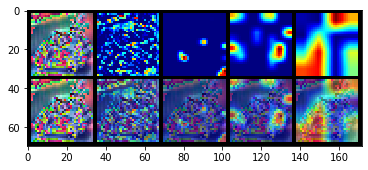

In [21]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToPILImage()
pil_img = trans(torchvision.utils.make_grid(images[6]))
torch_img, norm_torch_img = helper.transform_to_device(pil_img)
helper.plot_images(torch_img, norm_torch_img, Net)